<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/10_01_fft2_ifft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

In [2]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [3]:
birdfn = "bird.png"
file = f"{base}{birdfn}"
!curl -O $file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  266k  100  266k    0     0  2097k      0 --:--:-- --:--:-- --:--:-- 2113k


In [4]:
bird = cv2.imread(birdfn, cv2.IMREAD_GRAYSCALE)
bird.shape

(656, 592)

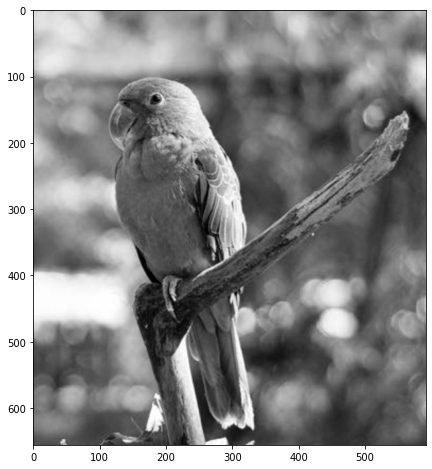

In [5]:
plt.subplots(figsize=(8, 8))
plt.imshow(bird, cmap="gray")

In [43]:
def fft_test(img):
  f = fft.fft2(img)
  fshift = fft.fftshift(f)
  mag_spectrum = 20*np.log(np.abs(fshift))
  mag_spectrum = np.asarray(mag_spectrum, dtype=np.uint8)
  return mag_spectrum

def fft_show(img):
  mag_spectrum = fft_test(img)
  img_mag = np.concatenate((img, mag_spectrum), axis=1)

  plt.subplots(figsize=(16, 8))
  plt.imshow(img_mag, cmap="gray")

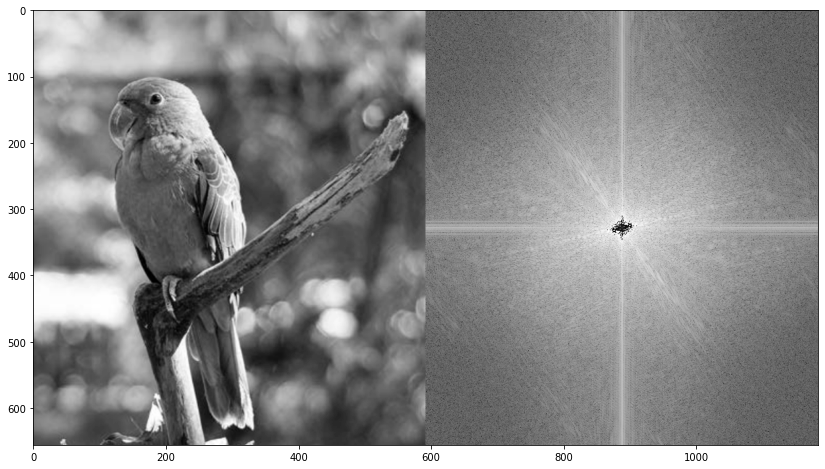

In [44]:
fft_show(bird)

In [24]:
marsfn = "MarteC.jpeg"
file = f"{base}{marsfn}"
!curl -O $file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31260  100 31260    0     0   287k      0 --:--:-- --:--:-- --:--:--  285k


In [25]:
mars = cv2.imread(marsfn, cv2.IMREAD_GRAYSCALE)

fft_show(mars)

NameError: ignored

In [54]:
def fft_show2(img):
  mag_spectrum = fft_test(img)
  f = np.exp(mag_spectrum/20.0)
  f = fft.ifftshift(f)
  img2 = fft.ifft2(f)
  img2 = np.abs(img2)
  img2 = img2.astype(np.uint8)

  #print(np.max(img2))
  #print(np.min(img2))

  #plt.hist(img2.ravel(), 256)

  mag_img = np.concatenate((mag_spectrum, img2), axis=1)

  plt.subplots(figsize=(16, 8))
  plt.imshow(mag_img, cmap="gray")

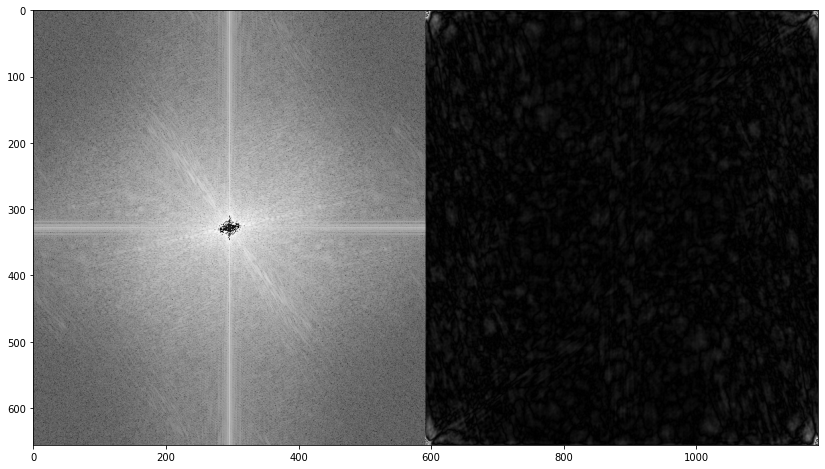

In [55]:
fft_show2(bird)

In [11]:
moonfs = "moonlanding.png"
file = f"{base}{moonfs}"
!curl -O $file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  211k  100  211k    0     0  1577k      0 --:--:-- --:--:-- --:--:-- 1577k


In [12]:
moon = cv2.imread(moonfs, cv2.IMREAD_GRAYSCALE)

In [9]:
from matplotlib.colors import LogNorm

def do(img):
  f = fft.fft2(img)
  fs = fft.fftshift(f)

  real = fs.real
  phases = fs.imag

  kf = 0.1
  real2 = real.copy()
  r, c = real2.shape
  real2[int(r*kf):int(r*(1-kf))] = 0
  real2[:, int(c*kf):int(c*(1-kf))] = 0

  fs2 = np.empty(real.shape, dtype=complex)

  fs2.real = real2
  fs2.imag = phases

  f2 = fft.ifftshift(fs2)

  img2 = fft.ifft2(f2)

  img2 = np.abs(img2)

  plt.subplots(figsize=(12, 12))
  plt.subplot(221)
  plt.imshow(img, cmap='gray')
  plt.subplot(222)
  plt.imshow(real, norm=LogNorm(vmin=5), cmap='gray')
  plt.subplot(223)
  plt.imshow(real2, norm=LogNorm(vmin=5), cmap='gray')
  plt.subplot(224)
  plt.imshow(img2, cmap='gray')
  plt.show()

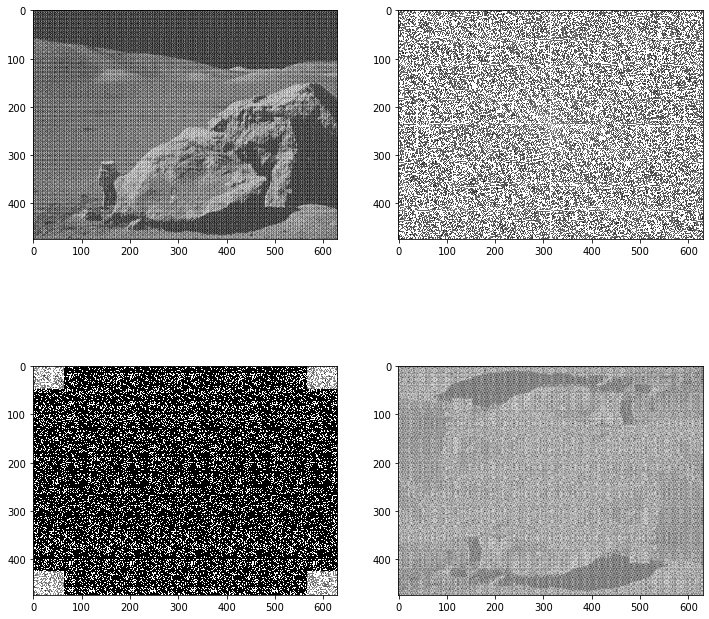

In [13]:
do(moon)

In [39]:
from scipy import fftpack

def do2(img, kf=0.1):
  f = fftpack.fft2(img)
  
  f2 = f.copy()
  r, c = f2.shape
  f2[int(r*kf):int(r*(1-kf))] = 0
  f2[:, int(c*kf):int(c*(1-kf))] = 0

  img2 = fftpack.ifft2(f2).real

  plt.subplots(figsize=(12, 12))
  plt.subplot(221)
  plt.imshow(img, cmap='gray')
  plt.subplot(222)
  plt.imshow(np.abs(f), norm=LogNorm(vmin=25), cmap='gray')
  plt.subplot(223)
  plt.imshow(np.abs(f2), norm=LogNorm(vmin=25), cmap='gray')
  plt.subplot(224)
  plt.imshow(img2, cmap='gray')
  plt.show()

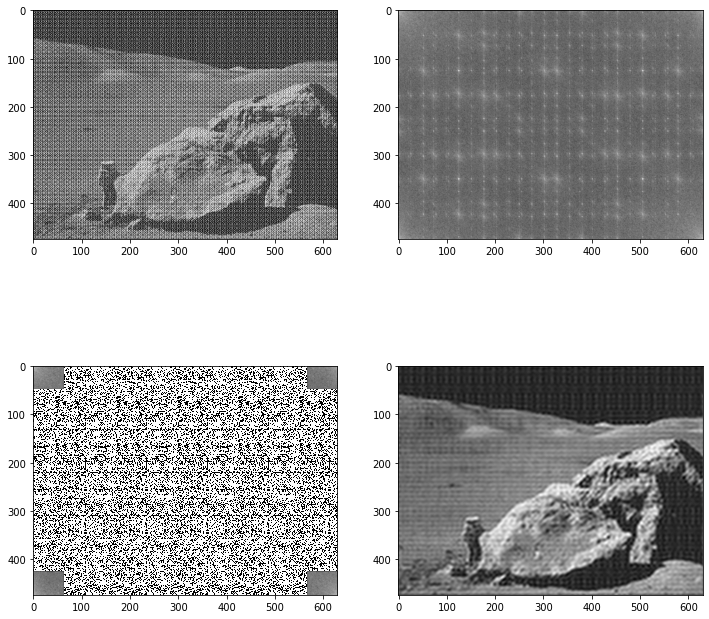

In [40]:
do2(moon)

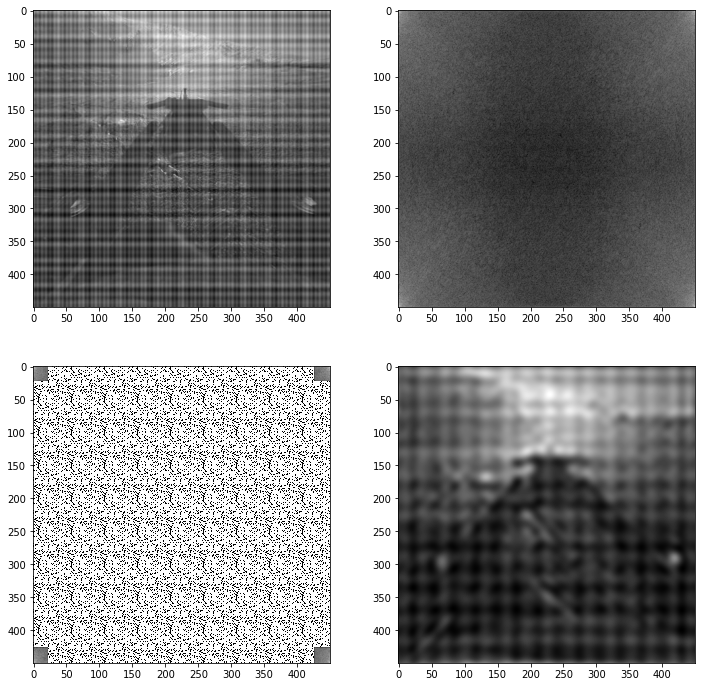

In [41]:
do2(mars, 0.05)